In [1]:
import pandas as pd

# vars
fileMetadata = {}
tableDataList = []
metadataCsvFile = 'fsl/FSL_csv/FSL_csv/FTHP_metadata.csv'

metadata_df = pd.read_csv(metadataCsvFile)
numRowsMetaData = len(metadata_df)


for rowNum in range (numRowsMetaData):
    csvFile = 'fsl/FSL_csv/FSL_csv/fast_{}_seg.csv'.format(rowNum)

    with open(csvFile, 'r') as file:
        tableData = []
        isTable = False
        for line in file:
            if line.startswith('#'):
                parts = line.split()
                if len(parts) >= 2:
                    if parts[1] == "ColHeaders":
                        isTable = True
                        colHeaders = parts[2:]
                    elif not isTable:
                        fileMetadata[parts[1]] = ' '.join(parts[2:])
            elif isTable and line.strip():
                values = line.split()
                if len(values) == len(colHeaders):
                    tableData.append(values)

    if tableData:
        df = pd.DataFrame(tableData, columns=colHeaders)

        manufacturer_info = metadata_df.iloc[rowNum]['manufacturer']
        model_info = metadata_df.iloc[rowNum]['model']
        df['Manufacturer'] = manufacturer_info
        df['Model'] = model_info

        print(f"Data from file {csvFile}:")
        print(df)

        tableDataList.append(df)
    else:
        print(f"No table data found in the file {csvFile}.")

if tableDataList:
    concatenated_df = pd.concat(tableDataList, ignore_index=True)
    print("\nConcatenated DataFrame:")
    print(concatenated_df)

Data from file fsl/FSL_csv/FSL_csv/fast_0_seg.csv:
  Index SegId   NVoxels Volume_mm3 StructName             Manufacturer   Model
0     1     0  14987035  9512428.0    Seg0000  Philips Medical Systems  Intera
1     2     1    653230   414611.9    Seg0001  Philips Medical Systems  Intera
2     3     2   1056072   670300.0    Seg0002  Philips Medical Systems  Intera
3     4     3    898031   569989.7    Seg0003  Philips Medical Systems  Intera
Data from file fsl/FSL_csv/FSL_csv/fast_1_seg.csv:
  Index SegId  NVoxels Volume_mm3 StructName Manufacturer Model
0     1     0  8730339  8325900.0    Seg0000      SIEMENS  Aera
1     2     1   458639   437392.2    Seg0001      SIEMENS  Aera
2     3     2   685994   654214.9    Seg0002      SIEMENS  Aera
3     4     3   610788   582492.8    Seg0003      SIEMENS  Aera
Data from file fsl/FSL_csv/FSL_csv/fast_2_seg.csv:
  Index SegId  NVoxels Volume_mm3 StructName Manufacturer   Model
0     1     0  5905528  5631950.5    Seg0000      SIEMENS  Avanto


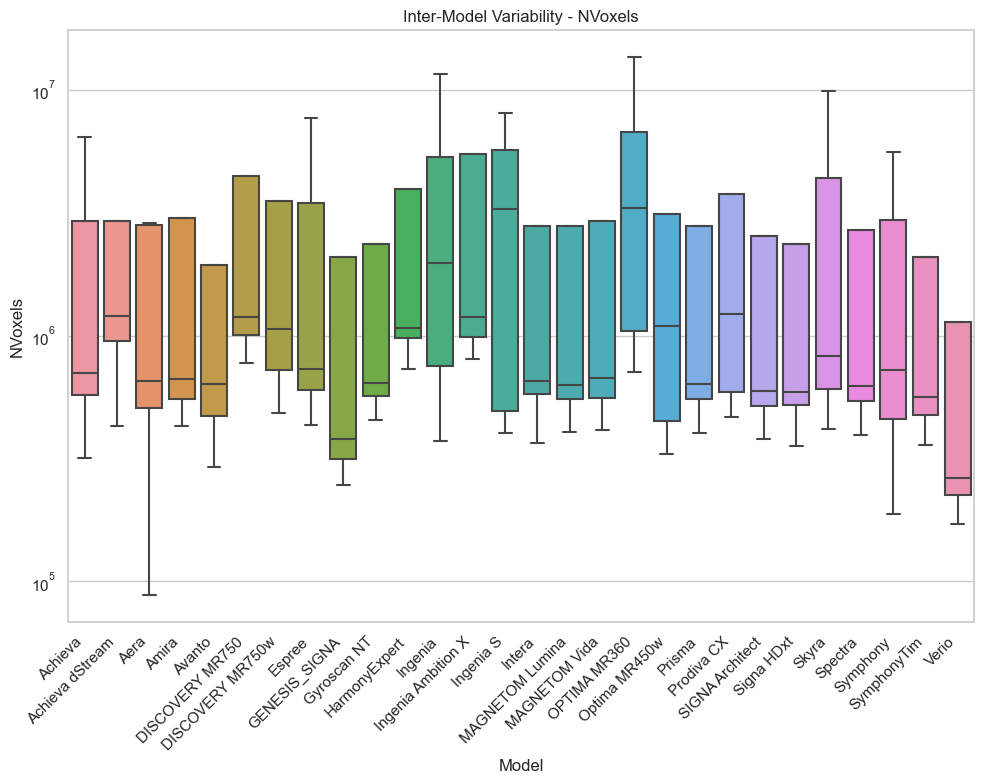

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of models (unique values in the 'Model' column)

#update to apply dataframe from parser
concatenated_df['NVoxels'] = pd.to_numeric(concatenated_df['NVoxels'], errors='coerce')
concatenated_df = concatenated_df.dropna(subset=['NVoxels'])

concatenated_df['Model'] = concatenated_df['Model'].astype('category')


plt.figure(figsize=(10, 8))
sns.set(style='whitegrid')


sns.boxplot(x='Model', y='NVoxels', data=concatenated_df, sym='')

plt.title('Inter-Model Variability - NVoxels')
plt.xlabel('Model')
plt.ylabel('NVoxels')

# Set the y-axis to a logarithmic scale
plt.yscale('log')  

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

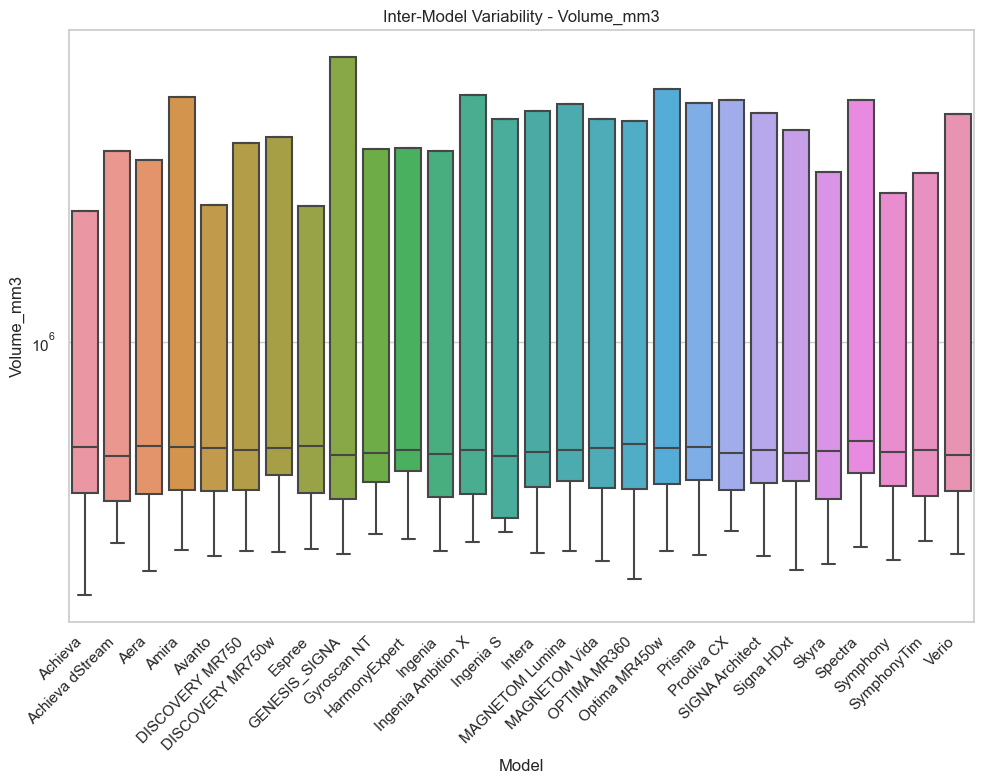

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# List of models (unique values in the 'Model' column)
#models = concatenated_df['Model'].unique()
concatenated_df['Volume_mm3'] = pd.to_numeric(concatenated_df['Volume_mm3'], errors='coerce')
concatenated_df = concatenated_df.dropna(subset=['Volume_mm3'])

concatenated_df['Model'] = concatenated_df['Model'].astype('category')

plt.figure(figsize=(10, 8))
sns.set(style='whitegrid')


sns.boxplot(x='Model', y='Volume_mm3', data=concatenated_df,sym='')

plt.title('Inter-Model Variability - Volume_mm3')
plt.xlabel('Model')
plt.ylabel('Volume_mm3')

# Set the y-axis to a logarithmic scale
plt.yscale('log')  

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()